In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 실습용 데이터

In [ ]:
DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/product.csv')

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15009 entries, 0 to 15008
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           15009 non-null  object 
 1   meanPriceEach  15009 non-null  float64
 2   totalOrder     15009 non-null  float64
 3   orderType_1    15009 non-null  float64
 4   orderType_2    15009 non-null  float64
 5   orderType_3    15009 non-null  float64
 6   totalBundle    15009 non-null  float64
 7   bundleType_1   15009 non-null  float64
 8   bundleType_2   15009 non-null  float64
 9   customerType   15009 non-null  object 
 10  FY             15009 non-null  int64  
 11  Country        15009 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 1.4+ MB


In [ ]:
DF.head()

,Date,meanPriceEach,totalOrder,orderType_1,orderType_2,orderType_3,totalBundle,bundleType_1,bundleType_2,customerType,FY,Country
0,2015-01-04,1.56,58065.35,10049.66,25228.37,3672.89,19114.43,17280.89,1833.54,Online,2015,25
1,2015-01-04,1.10,2578275.12,575245.44,1311502.53,181058.65,510468.50,429166.89,80986.81,Offline,2015,25
2,2015-01-11,1.17,2335986.11,560119.16,1032606.49,191515.19,551745.27,465764.93,85966.27,Offline,2015,25
3,2015-01-11,1.52,65483.08,14570.74,30445.75,3170.11,17296.48,16715.45,581.03,Online,2015,25
4,2015-01-18,1.65,52559.10,11415.28,25306.56,3345.08,12492.18,10971.43,1520.75,Online,2015,25


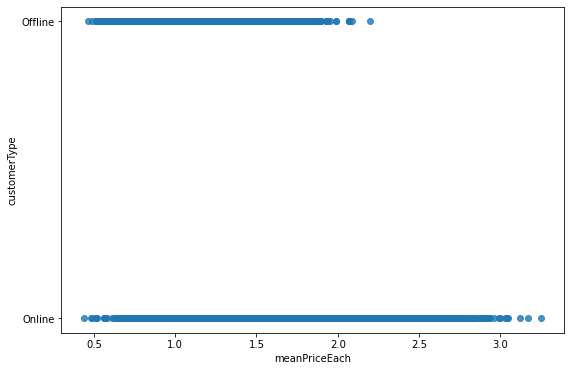

In [98]:
fig = plt.figure(figsize = (9, 6))
sns.regplot(x = 'meanPriceEach', y = 'customerType', data = DF, fit_reg = False)
plt.show()

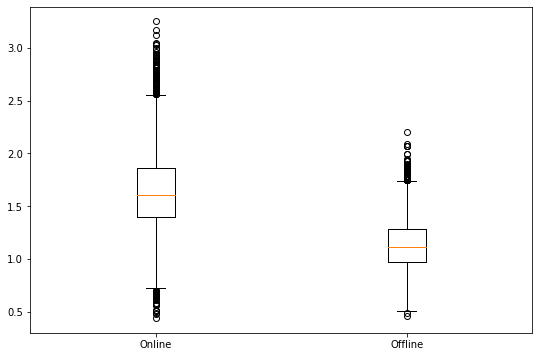

In [96]:
plt.figure(figsize = (9, 6))
plt.boxplot([DF[DF.customerType == 'Online'].meanPriceEach,
            DF[DF.customerType == 'Offline'].meanPriceEach],
            labels = ['Online', 'Offline'])

plt.show()

# orderType_1

In [48]:
X1 = DF[['orderType_1']]
y = DF['customerType']

- Standardization

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X1_Scaled = scaler.fit_transform(X1)

X1_Scaled[:5]

array([[-0.22387636],
       [ 0.22273888],
       [ 0.21078616],
       [-0.22030383],
       [-0.22279726]])

- DF Split

In [50]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1_Scaled, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X1_train.shape, y1_train.shape)
print('Test Data : ', X1_test.shape, y1_test.shape)

Train Data :  (10506, 1) (10506,)
Test Data :  (4503, 1) (4503,)


- Model 생성

In [55]:
from sklearn.linear_model import LogisticRegression

Model_Ir1 = LogisticRegression()
Model_Ir1.fit(X1_train, y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

- Test Data를 Model 적용

In [56]:
y1_hat = Model_Ir1.predict(X1_test)
y1_hat

array(['Online', 'Offline', 'Offline', ..., 'Online', 'Online', 'Online'],
      dtype=object)

- Confusion Matrix(Positive : Offline)

In [59]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y1_test, y1_hat)

array([[1488,  739],
       [  74, 2202]])

- Confusion Matrix(Positive : Online)

In [60]:
confusion_matrix(y1_test, y1_hat, labels = ['Online', 'Offline'])

array([[2202,   74],
       [ 739, 1488]])

- Accuracy

In [99]:
from sklearn.metrics import accuracy_score

Accuracy_1 = accuracy_score(y1_test, y1_hat)
print(accuracy_score(y1_test, y1_hat))

0.8194536975349767


- F1-Score

In [100]:
from sklearn.metrics import f1_score

F1_1 = f1_score(y1_test, y1_hat, pos_label = 'Offline')
f1_score(y1_test, y1_hat, pos_label = 'Offline')

0.7854315122723673

# orderType_3

In [65]:
X3 = DF[['orderType_3']]
y = DF['customerType']

- Standardization

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X3_Scaled = scaler.fit_transform(X3)

X3_Scaled[:5]

array([[-0.18414441],
       [ 1.36565753],
       [ 1.45701529],
       [-0.18853715],
       [-0.18700845]])

- DF Split

In [67]:
from sklearn.model_selection import train_test_split

X3_train, X3_test, y3_train, y3_test = train_test_split(X3_Scaled, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X3_train.shape, y3_train.shape)
print('Test Data : ', X3_test.shape, y3_test.shape)

Train Data :  (10506, 1) (10506,)
Test Data :  (4503, 1) (4503,)


- Model 생성

In [68]:
from sklearn.linear_model import LogisticRegression

Model_Ir3 = LogisticRegression()
Model_Ir3.fit(X3_train, y3_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

- Test Data를 Model 적용

In [69]:
y3_hat = Model_Ir3.predict(X3_test)
y3_hat

array(['Online', 'Offline', 'Online', ..., 'Offline', 'Online', 'Online'],
      dtype=object)

- Confusion Matrix(Positive : Offline)

In [72]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y3_test, y3_hat)

array([[1324,  903],
       [  54, 2222]])

- Accuracy

In [102]:
from sklearn.metrics import accuracy_score

Accuracy_3 = accuracy_score(y3_test, y3_hat)
print(accuracy_score(y3_test, y3_hat))

0.787475016655563


- F1-Score

In [101]:
from sklearn.metrics import f1_score

F1_3 = f1_score(y3_test, y3_hat, pos_label = 'Offline')
f1_score(y3_test, y3_hat, pos_label = 'Offline')

0.7345353675450763

# bundleType_2

In [79]:
X_b2 = DF[['bundleType_2']]
y = DF['customerType']

- Standardization

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_b2_Scaled = scaler.fit_transform(X_b2)

X_b2_Scaled[:5]

array([[-0.21676545],
       [ 0.13919172],
       [ 0.16158466],
       [-0.22239806],
       [-0.21817208]])

- DF Split

In [81]:
from sklearn.model_selection import train_test_split

X_b2_train, X_b2_test, y_b2_train, y_b2_test = train_test_split(X_b2_Scaled, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_b2_train.shape, y_b2_train.shape)
print('Test Data : ', X_b2_test.shape, y_b2_test.shape)

Train Data :  (10506, 1) (10506,)
Test Data :  (4503, 1) (4503,)


- Model 생성

In [82]:
from sklearn.linear_model import LogisticRegression

Model_Ir_b2 = LogisticRegression()
Model_Ir_b2.fit(X_b2_train, y_b2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

- Test Data를 Model 적용

In [83]:
y_b2_hat = Model_Ir_b2.predict(X_b2_test)
y_b2_hat

array(['Online', 'Offline', 'Online', ..., 'Offline', 'Online', 'Offline'],
      dtype=object)

- Confusion Matrix(Positive : Offline)

In [84]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_b2_test, y_b2_hat)

array([[ 977, 1250],
       [ 169, 2107]])

- Accuracy

In [85]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_b2_test, y_b2_hat))

0.6848767488341105


- F1-Score

In [86]:
from sklearn.metrics import f1_score

f1_score(y_b2_test, y_b2_hat, pos_label = 'Offline')

0.5793062555588496

# meanPriceEach

In [87]:
X_m = DF[['meanPriceEach']]
y = DF['customerType']

- Standardization

In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_m_Scaled = scaler.fit_transform(X_m)

X_m_Scaled[:5]

array([[ 0.43582603],
       [-0.70554784],
       [-0.53186052],
       [ 0.33657613],
       [ 0.65913831]])

- DF Split

In [89]:
from sklearn.model_selection import train_test_split

X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_m_Scaled, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_m_train.shape, y_m_train.shape)
print('Test Data : ', X_m_test.shape, y_m_test.shape)

Train Data :  (10506, 1) (10506,)
Test Data :  (4503, 1) (4503,)


- Model 생성

In [90]:
from sklearn.linear_model import LogisticRegression

Model_Ir_m = LogisticRegression()
Model_Ir_m.fit(X_m_train, y_m_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

- Test Data를 Model 적용

In [92]:
y_m_hat = Model_Ir_m.predict(X_m_test)
y_m_hat

array(['Online', 'Offline', 'Offline', ..., 'Offline', 'Online',
       'Offline'], dtype=object)

- Confusion Matrix(Positive : Offline)

In [93]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_m_test, y_m_hat)

array([[1806,  421],
       [ 454, 1822]])

- Accuracy

In [103]:
from sklearn.metrics import accuracy_score

Accuracy_m = accuracy_score(y_m_test, y_m_hat)
print(accuracy_score(y_m_test, y_m_hat))

0.8056850988230069


- F1_Score

In [104]:
from sklearn.metrics import f1_score

F1_m = f1_score(y_m_test, y_m_hat, pos_label = 'Offline')
f1_score(y_m_test, y_m_hat, pos_label = 'Offline')

0.8049921996879874

# F-Score 시각화

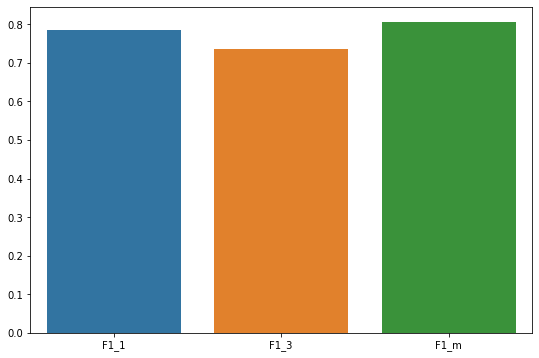

In [108]:
plt.figure(figsize = (9, 6))
x = ['F1_1', 'F1_3', 'F1_m']
y = [F1_1, F1_3, F1_m]
sns.barplot(x = x, y = y)